## Library

In [1]:
import project_path

import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sqlite3 as sl
from tqdm import tqdm

from lib.utils import iterate_over
from lib.utils import load_config_and_check
from lib.inspector import Inspector

%load_ext autoreload
%autoreload 2

In [2]:
import ast
import astpretty

def show_tree(code: str):
    tree = ast.parse(code)
    astpretty.pprint(tree)

In [3]:
from lib.mr import ChangeQubitOrder
config = load_config_and_check("../config/qmt_v23.yaml")

In [4]:
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
module_path

'/home/paltenmo/projects'

In [5]:
os.pardir

'..'

In [6]:
os.pardir

'..'

In [7]:
FAKE_SOURCE = """
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr_qr = QuantumRegister(9, name='qr_qr')
cr_qr = ClassicalRegister(9, name='cr_qr')
qc = QuantumCircuit(qr_qr, cr_qr, name='qc')
qc.append(SXdgGate(), qargs=[qr_qr[7]], cargs=[])
qc.append(ECRGate(), qargs=[qr_qr[2], qr_qr[6]], cargs=[])
qc.append(iSwapGate(), qargs=[qr_qr[5], qr_qr[4]], cargs=[])

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=0)

# SECTION
# NAME: MEASUREMENT

qc.measure(qr_qr, cr_qr)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_213141889afb4ac19d274fe469f89af0 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_213141889afb4ac19d274fe469f89af0, shots=3919).result().get_counts(qc)
RESULT = counts
"""

In [4]:
mr = ChangeQubitOrder("prova", code_of_source=FAKE_SOURCE, metamorphic_strategies_config=config["metamorphic_strategies"])

TypeError: Can't instantiate abstract class ChangeQubitOrder with abstract methods check_output_relationship

## Separable Circuits

In [10]:
circuit_code = """qr_1 = QuantumRegister(3, name='qr_1')
cr_1 = ClassicalRegister(3, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[2]], cargs=[])"""

circuit_name = "qc_1"
register_name = "qr_1"

[0]
[0]
[1, 0]
add to the graph
[0, 1]
add to the graph
[0]
[2]


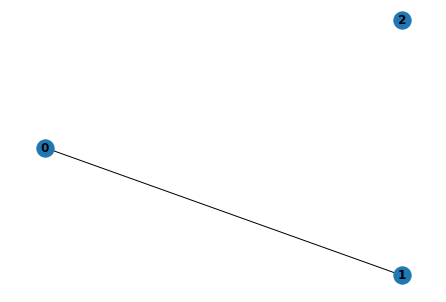

In [19]:
import re
import networkx as nx
from itertools import combinations

lines = circuit_code.split("\n")
connections = []
circuit_related_lines = [
    line for line in lines if f"{circuit_name}." in line]
qubit_interaction_graph = nx.Graph()
for line in circuit_related_lines:
    regex = f"{register_name}\[(\d+)\]"
    qubits_involved = re.findall(regex, line)
    qubits_involved = [int(q) for q in qubits_involved]
    if qubits_involved:
        # print(qubits_involved)
        
        for q in qubits_involved:
            qubit_interaction_graph.add_node(q)
        
        if len(qubits_involved) > 1:
            # consider it as edge
            print("add to the graph")
            new_edges = combinations(qubits_involved, 2)
            qubit_interaction_graph.add_edges_from(new_edges)
            
nx.draw_shell(
    qubit_interaction_graph, with_labels=True, font_weight='bold')    

In [26]:
sub_graphs = nx.connected_components(qubit_interaction_graph)
connected_components_set = set([frozenset(g) for g in sub_graphs])
connected_components_set

{frozenset({0, 1}), frozenset({2})}

In [27]:
expected = {frozenset({0, 1}), frozenset({2})}
expected

{frozenset({0, 1}), frozenset({2})}

In [28]:
assert connected_components_set == expected

In [12]:
re.findall(r"qr_1\[(\d+)\]", circuit_code)

['0', '0', '1', '0', '0', '1', '0', '2']

In [32]:
for x in range(1, 2):
    print(x)

1


# Preamble

In [8]:
code_of_source = """

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023,6.167666341622349,4.176789578690695), qargs=[qr[8], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161,2.6969488851398467,4.556283845054034), qargs=[qr[7]], cargs=[])
qc.append(CXGate(), qargs=[qr[1], qr[4]], cargs=[])
qc.append(RZGate(4.120878090041712), qargs=[qr[6]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[7], qr[3], qr[6]], cargs=[])
qc.append(CZGate(), qargs=[qr[6], qr[5]], cargs=[])
qc.append(DCXGate(), qargs=[qr[3], qr[7]], cargs=[])
qc.append(ZGate(), qargs=[qr[3]], cargs=[])
qc.append(ZGate(), qargs=[qr[6]], cargs=[])
qc.append(TGate(), qargs=[qr[8]], cargs=[])
qc.append(RZGate(4.7982408464889215), qargs=[qr[6]], cargs=[])
qc.append(CU1Gate(5.872199665531033), qargs=[qr[7], qr[0]], cargs=[])
qc.append(SGate(), qargs=[qr[0]], cargs=[])
qc.append(CZGate(), qargs=[qr[7], qr[8]], cargs=[])
qc.append(CRZGate(3.8424030831409595), qargs=[qr[7], qr[2]], cargs=[])
qc.append(ZGate(), qargs=[qr[4]], cargs=[])
qc.append(RXXGate(5.507020553946652), qargs=[qr[6], qr[8]], cargs=[])
qc.append(CU1Gate(0.8208487059024755), qargs=[qr[0], qr[3]], cargs=[])

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc)
RESULT = counts"""

In [93]:
from lib.mr import RunIndependentPartitions
from lib.mr import AddUnusedRegister
from lib.mr import InjectParameters
from lib.mr import ToQasmAndBack
from lib.mr import AddUnusedRegister

[autoreload of lib.mr.run_independent_partitions failed: Traceback (most recent call last):
  File "/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/paltenmo/.conda/envs/ML4Quantum/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._b

In [16]:
config = load_config_and_check("../config/qmt_v11.yaml")

## Test: ToQasmAndBack

In [17]:
transf = ToQasmAndBack(
    name="ToQasmAndBack",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
transf.check_precondition(code_of_source)
out = transf.derive(code_of_source)
print(out)

Follow: add qc convertion to and from QASM (before: EXECUTION
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023, 6.167666341622349, 4.176789578690695), qargs=[qr[8], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161, 2.6969488851398467, 4.556283845054034), qargs=[qr[7]], cargs=[])
qc.append(CXGate(), qargs=[qr[1], qr[4]], cargs=[])
qc.append(RZGate(4.120878090041712), qargs=[qr[6]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[7], qr[3], qr[6]], cargs=[])
qc.append(CZGate(), qargs=[qr[6], qr[5]], cargs=[])
qc.append(DCXGate(), qargs=[qr[3], qr[7]], cargs=[])
qc.append(ZGate(), qargs=[qr[3]], cargs=[])
qc.append(ZGate(), qargs=[qr[6]], cargs=[])
qc.append(TGate(), q

In [ ]:
transf.check_precondition(out)
out_2 = transf.derive(out)
print(out_2)

In [21]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: PARAMETERS

p_b4e18a = Parameter('p_b4e18a')
p_d6f4de = Parameter('p_d6f4de')
p_f8d5cb = Parameter('p_f8d5cb')
p_6f6798 = Parameter('p_6f6798')
p_8f1b18 = Parameter('p_8f1b18')
p_54c99b = Parameter('p_54c99b')
p_27e391 = Parameter('p_27e391')
p_9410b5 = Parameter('p_9410b5')
p_8c78e2 = Parameter('p_8c78e2')
p_53c3a2 = Parameter('p_53c3a2')
p_0643e5 = Parameter('p_0643e5')

# SECTION
# NAME: CIRCUIT
qr = QuantumRegister(7, name='qr')
cr = ClassicalRegister(7, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(RZZGate(p_f8d5cb), qargs=[qr[5], qr[6]], cargs=[])
qc.append(CSwapGate(), qargs=[qr[6], qr[4], qr[1]], cargs=[])
qc.append(RYYGate(p_54c99b), qargs=[qr[2], qr[5]], cargs=[])
qc.append(RYYGate(p_8f1b18), qargs=[qr[0], qr[4]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[3], qr[2]], cargs=[])
qc.append(ECRGate(), qargs=[qr[6], qr[0]], cargs=[])
qc.append(RZXGate(p_27e391), qargs=[qr[0], qr[6]], cargs=[])
qc.append(RYYGate(p_9410b5), qargs=[qr[3], qr[4]], cargs=[])
qc.append(CSwapGate(), qargs=[qr[1], qr[0], qr[6]], cargs=[])
qc.append(HGate(), qargs=[qr[2]], cargs=[])
qc.append(YGate(), qargs=[qr[3]], cargs=[])
qc.append(RZXGate(p_53c3a2), qargs=[qr[0], qr[1]], cargs=[])
qc.append(CRXGate(p_8c78e2), qargs=[qr[3], qr[5]], cargs=[])
qc.append(RZXGate(p_b4e18a), qargs=[qr[1], qr[3]], cargs=[])
qc.append(RXGate(p_0643e5), qargs=[qr[0]], cargs=[])
qc.append(TGate(), qargs=[qr[5]], cargs=[])
qc.append(CSwapGate(), qargs=[qr[2], qr[5], qr[0]], cargs=[])
qc.append(SdgGate(), qargs=[qr[0]], cargs=[])
qc.append(RXGate(p_6f6798), qargs=[qr[3]], cargs=[])
qc.append(SdgGate(), qargs=[qr[5]], cargs=[])
qc.append(CHGate(), qargs=[qr[6], qr[5]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[2], qr[1]], cargs=[])
qc.append(RXGate(p_d6f4de), qargs=[qr[5]], cargs=[])
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: PARAMETER_BINDING

qc = qc.bind_parameters({p_b4e18a: 5.750557455994805, p_d6f4de: 0.041239490820221554, p_f8d5cb: 2.0549471012132114, p_6f6798: 5.773025482276404, p_8f1b18: 1.7784823832136227, p_54c99b: 4.549715767353061, p_27e391: 1.7009764849793279, p_9410b5: 0.8783624118527082, p_8c78e2: 3.456774343949486, p_53c3a2: 4.626516799242062,
    p_0643e5: 4.810686391845515,
})

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=2, coupling_map=None)
# SECTION
# NAME: QASM_CONVERTION
qc.qasm(formatted=True)

OPENQASM 2.0;
include "qelib1.inc";
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(-pi/4) q1; cx q0,q1; h q1; }
gate rzx(param0) q0,q1 { h q1; cx q0,q1; rz(pi/4) q1; cx q0,q1; h q1; }
gate ryy(param0) q0,q1 { rx(pi/2) q0; rx(pi/2) q1; cx q0,q1; rz(4.54971576735306) q1; cx q0,q1; rx(-pi/2) q0; rx(-pi/2) q1; }
gate iswap q0,q1 { s q0; s q1; h q0; cx q0,q1; cx q1,q0; h q1; }
gate ryy_140303108972992(param0) q0,q1 { rx(pi/2) q0; rx(pi/2) q1; cx q0,q1; rz(1.77848238321362) q1; cx q0,q1; rx(-pi/2) q0; rx(-pi/2) q1; }
gate ryy_140303108973136(param0) q0,q1 { rx(pi/2) q0; rx(pi/2) q1; cx q0,q1; rz(0.878362411852708) q1; cx q0,q1; rx(-pi/2) q0; rx(-pi/2) q1; }
gate ecr q0,q1 { rzx(pi/4) q0,q1; x q0; rzx(-pi/4) q0,q1; }
gate rzx_140303108973424(param0) q0,q1 { h q1; cx q0,q1; rz(1.70097648497933) q1; cx q0,q1; h q1; }
gate rzx_140303108973568(param0) q0,q1 { h q1; cx q0,q1; rz(4.62651679924206) q1; cx q0,q1; h q1; }
gate rzx_140303108973664(param0) q0,q1 { h q1; cx q0,q1; rz(5.75055745599481) q1; c

In [20]:
qc = QuantumCircuit.from_qasm_str(qc.qasm())
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_e5edeb491b5e49f59d37b5d841e91f7e = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_e5edeb491b5e49f59d37b5d841e91f7e, shots=1959).result().get_counts(qc)
RESULT = counts

QasmError: "Duplicate declaration for gate 'rzx' at line 4, file .\nPrevious occurrence at line 3, file "

In [29]:
import ast
import astor
from lib.metamorph import to_code

out = astor.to_source(ast.parse("""qc = qc.bind_parameters({p_53f0d4: 1.105144286634091, p_29392d: 4.891764473923016, p_b2bdc1: 0.1625296290711818, p_cd5111: 0.3908687376899154, p_a7c416: 4.409521177200427})
"""))
print(out)

qc = qc.bind_parameters({p_53f0d4: 1.105144286634091, p_29392d: 
    4.891764473923016, p_b2bdc1: 0.1625296290711818, p_cd5111: 
    0.3908687376899154, p_a7c416: 4.409521177200427})



## Test: InjectParameters


In [36]:
transf = InjectParameters(
    name="InjectParameters",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
transf.check_precondition(code_of_source)
out = transf.derive(code_of_source)
print(out)
transf.check_precondition(out)
out_2 = transf.derive(out)
print(out_2)

Values to change: 10
Follow: from concrete values to parameters (10/12):{'p_8bd2cc': 2.6969488851398467, 'p_875719': 4.176789578690695, 'p_58573b': 6.167666341622349, 'p_9bc4c6': 5.507020553946652, 'p_2930b9': 3.9641736341624023, 'p_715b8b': 0.8208487059024755, 'p_00dcd5': 4.556283845054034, 'p_4d1a91': 3.8424030831409595, 'p_d3f82e': 4.120878090041712, 'p_4d8309': 5.872199665531033}
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: PARAMETERS
# SECTION
# NAME: PARAMETERS
p_8bd2cc = Parameter('p_8bd2cc')
p_875719 = Parameter('p_875719')
p_58573b = Parameter('p_58573b')
p_9bc4c6 = Parameter('p_9bc4c6')
p_2930b9 = Parameter('p_2930b9')
p_715b8b = Parameter('p_715b8b')
p_00dcd5 = Parameter('p_00dcd5')
p_4d1a91 = Parameter('p_4d1a91')
p_d3f82e = Parameter('p_d3f82e')
p_4d8309 = Parameter('p_4d8309')

# SECTION
# NAME: CIRCU

In [16]:
%debug


> /home/paltenmo/projects/ML4Quantum/lib/mr/inject_parameters.py(93)derive()
     91         # parameters
     92         measurement_area = sections["MEASUREMENT"]
---> 93         main_circuit_id = metamorph.get_circuits_used(measurement_area)[0]["name"]
     94 
     95         binding_area = sections["PARAMETER_BINDING"]

ipdb> measurement_area
'\nqc.measure(qr, cr)\n'
ipdb> q


In [37]:
GLOBALS = {"RESULT": 0}
exec(out_2, GLOBALS)
result = GLOBALS["RESULT"]

In [38]:
result

{'101000000': 243, '000000000': 1705, '010001000': 1697, '111001000': 274}

In [40]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: PARAMETERS
# SECTION
# NAME: PARAMETERS
p_635ba3 = Parameter('p_635ba3')
p_fae9fb = Parameter('p_fae9fb')
p_57350f = Parameter('p_57350f')
p_e7a107 = Parameter('p_e7a107')
p_2a349d = Parameter('p_2a349d')
p_66bb34 = Parameter('p_66bb34')
p_a14f4b = Parameter('p_a14f4b')
p_fc847c = Parameter('p_fc847c')
p_5e95c0 = Parameter('p_5e95c0')
p_ead18a = Parameter('p_ead18a')
p_ea6b6f = Parameter('p_ea6b6f')
p_25b26e = Parameter('p_25b26e')
p_3bc0e6 = Parameter('p_3bc0e6')
p_4978fb = Parameter('p_4978fb')
p_0d7222 = Parameter('p_0d7222')
p_1c65da = Parameter('p_1c65da')
p_59eb9a = Parameter('p_59eb9a')
p_f7570d = Parameter('p_f7570d')
p_28612d = Parameter('p_28612d')

# SECTION
# NAME: CIRCUIT
qr = QuantumRegister(8, name='qr')
cr = ClassicalRegister(8, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(RC3XGate(), qargs=[qr[5], qr[4], qr[7], qr[0]], cargs=[])
qc.append(RYGate(p_28612d), qargs=[qr[6]], cargs=[])
qc.append(CPhaseGate(p_4978fb), qargs=[qr[4], qr[6]], cargs=[])
qc.append(SXdgGate(), qargs=[qr[4]], cargs=[])
qc.append(ZGate(), qargs=[qr[7]], cargs=[])
qc.append(SXdgGate(), qargs=[qr[6]], cargs=[])
qc.append(C4XGate(), qargs=[qr[0], qr[4], qr[2], qr[3], qr[1]], cargs=[])
qc.append(SXGate(), qargs=[qr[5]], cargs=[])
qc.append(CU3Gate(p_1c65da, p_e7a107, p_0d7222), qargs=[qr[7], qr[2]], cargs=[]
    )
qc.append(XGate(), qargs=[qr[4]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[6], qr[0]], cargs=[])
qc.append(CYGate(), qargs=[qr[7], qr[5]], cargs=[])
qc.append(RYGate(p_ea6b6f), qargs=[qr[3]], cargs=[])
qc.append(SXdgGate(), qargs=[qr[6]], cargs=[])
qc.append(CSXGate(), qargs=[qr[4], qr[2]], cargs=[])
qc.append(XGate(), qargs=[qr[7]], cargs=[])
qc.append(PhaseGate(1.2438266115605516), qargs=[qr[7]], cargs=[])
qc.append(SXGate(), qargs=[qr[0]], cargs=[])
qc.append(UGate(p_59eb9a, p_57350f, p_f7570d), qargs=[qr[2]], cargs=[])
qc.append(UGate(p_fc847c, p_25b26e, p_66bb34), qargs=[qr[3]], cargs=[])
qc.append(C3XGate(p_ead18a), qargs=[qr[7], qr[2], qr[4], qr[3]], cargs=[])
qc.append(ZGate(), qargs=[qr[7]], cargs=[])
qc.append(CYGate(), qargs=[qr[3], qr[4]], cargs=[])
qc.append(CPhaseGate(p_5e95c0), qargs=[qr[6], qr[7]], cargs=[])
qc.append(C4XGate(), qargs=[qr[3], qr[5], qr[0], qr[6], qr[4]], cargs=[])
qc.append(U3Gate(p_fae9fb, p_635ba3, 0.9258326441720094), qargs=[qr[6]],
    cargs=[])
qc.append(UGate(p_3bc0e6, p_2a349d, p_a14f4b), qargs=[qr[2]], cargs=[])
qc.append(XGate(), qargs=[qr[5]], cargs=[])
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: PARAMETER_BINDING
qc.draw(fold=-1)

┌────────┐                                                                                             ┌────────┐┌────┐                                                                                                                                            ┌─┐            
qr_0: ┤3       ├────────────────────────────────────────■────────────────────────────────────────────────────┤1       ├┤ √X ├────────────────────────────────────────────────────────────────────────────────────────────────────────■───────────────────────────────────┤M├────────────
      │        │                                      ┌─┴─┐                                                  │        │└┬─┬─┘                                                                                                        │                                   └╥┘            
qr_1: ┤        ├──────────────────────────────────────┤ X ├──────────────────────────────────────────────────┤        ├─┤M├──────────────────────────────────────────────────────────────────────────────────────────────────────────┼────────────────────────────────────╫─────────────
      │        │                                      └─┬─┘┌────────────────────────────────┐                │        │ └╥┘      ┌────┐   ┌───────────────────────────────┐      ┌───────────────────────────────┐              ┌─┐  │                                    ║             
qr_2: ┤        ├────────────────────────────────────────■──┤ U3(p_1c65da,p_e7a107,p_0d7222) ├────────────────┤        ├──╫───────┤ Sx ├───┤ U(p_59eb9a,p_57350f,p_f7570d) ├──■───┤ U(p_3bc0e6,p_2a349d,p_a14f4b) ├──────────────┤M├──┼────────────────────────────────────╫─────────────
      │        │                                        │  └───────────────┬────────────────┘┌──────────────┐│        │  ║       └─┬──┘   ├───────────────────────────────┤┌─┴──┐└───────────────────────────────┘              └╥┘  │                                    ║ ┌─┐         
qr_3: ┤        ├────────────────────────────────────────■──────────────────┼─────────────────┤ Ry(p_ea6b6f) ├┤  Iswap ├──╫─────────┼──────┤ U(p_fc847c,p_25b26e,p_66bb34) ├┤ Sx ├────────────────■───────────────────────────────╫───■────────────────────────────────────╫─┤M├─────────
      │  Rcccx │                              ┌──────┐  │                  │                 └────┬───┬─────┘│        │  ║         │      └───────────────────────────────┘└─┬──┘              ┌─┴─┐                             ║ ┌─┴─┐                                  ║ └╥┘┌─┐      
qr_4: ┤1       ├─────────────────■────────────┤ √Xdg ├──■──────────────────┼──────────────────────┤ X ├──────┤        ├──╫─────────■─────────────────────────────────────────■─────────────────┤ Y ├─────────────────────────────╫─┤ X ├──────────────────────────────────╫──╫─┤M├──────
      │        │     ┌────┐      │            └──────┘                     │                      ├───┤      │        │  ║                                                   │                 └───┘                             ║ └─┬─┘              ┌───┐               ║  ║ └╥┘┌─┐   
qr_5: ┤0       ├─────┤ √X ├──────┼─────────────────────────────────────────┼──────────────────────┤ Y ├──────┤        ├──╫───────────────────────────────────────────────────┼───────────────────────────────────────────────────╫───■────────────────┤ X ├───────────────╫──╫──╫─┤M├───
      │        │┌────┴────┴────┐ │P(p_4978fb) ┌──────┐                     │                      └─┬─┘      │        │  ║      ┌──────┐                                     │                                                   ║   │  ┌─────────────┴───┴─────────────┐ ║  ║  ║ └╥┘┌─┐
qr_6: ┤        ├┤ Ry(p_28612d) ├─■────────────┤ √Xdg ├─────────────────────┼────────────────────────┼────────┤0       ├──╫──────┤ √Xdg ├─────────────────────────────────────┼─────────────────────────────────────■─────────────╫───■──┤ U3(p_fae9fb,p_635ba3,0.92583) ├─╫──╫──╫──╫─┤M├
      │        │└────┬───┬─────┘              └──────┘                  

In [43]:
gate = C3XGate(2.3)
gate.__dict__

{'base_gate': Instruction(name='sx', num_qubits=1, num_clbits=0, params=[]),
 '_definition': None,
 '_name': 'c3sx',
 'num_qubits': 4,
 'num_clbits': 0,
 '_params': [],
 '_label': None,
 'condition': None,
 '_duration': None,
 '_unit': 'dt',
 '_num_ctrl_qubits': 3,
 '_ctrl_state': 7,
 '_angle': 2.3}

In [39]:
qc = qc.bind_parameters({
    p_635ba3: 0.8995363765101827,
    p_fae9fb: 3.93259544543144,
    p_57350f: 6.151167587061927,
    p_e7a107: 2.031963053978228,
    p_2a349d: 1.041601853524223,
    p_66bb34: 5.447933987599033,
    p_a14f4b: 3.356938865229232,
    p_fc847c: 6.150190310902739,
    p_5e95c0: 0.14740362211632352,
    p_ead18a: 4.684182496138248,
    p_ea6b6f: 2.9525339778910276,
    p_25b26e: 2.450261504210688,
    p_3bc0e6: 3.914387676578735,
    p_4978fb: 3.8958253680897545,
    p_0d7222: 4.115588921668292,
    p_1c65da: 5.6334380494507,
    p_59eb9a: 1.2475578981205417,
    p_f7570d: 4.766205850306024,
    p_28612d: 4.577315427580833,
})

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=2, coupling_map=None)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_7e67d8ab8ef944f9ba7f1e056f79a182 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_7e67d8ab8ef944f9ba7f1e056f79a182, shots=2771).result().get_counts(qc)
counts

CircuitError: 'Cannot bind parameters (p_ead18a) not present in the circuit.'

## Test: AddUnusedRegister

In [ ]:
transf = AddUnusedRegister(
    name="AddUnusedRegister",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
out = transf.derive(code_of_source)
print(out)

## Test: RunIndependentPartitions

In [31]:
transf = RunIndependentPartitions(
    name="RunIndependentPartitions",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
out = transf.derive(code_of_source)
print(out)

{'name': 'qc', 'quantum_register': 'qr', 'classical_register': 'cr', 'size': 9}
{frozenset({1, 4}), frozenset({0, 2, 3, 5, 6, 7, 8})}
[0 1]
clusters_of_this_partition [frozenset({1, 4})]
0 partition) qubits_of_this_partition: [1, 4]
clusters_of_this_partition [frozenset({0, 2, 3, 5, 6, 7, 8})]
1 partition) qubits_of_this_partition: [0, 2, 3, 5, 6, 7, 8]
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')


qc_1.append(CXGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(ZGate(), qargs=[qr_1[1]], cargs=[])


qr_2 = QuantumRegister(7, name='qr_2')
cr_2 = ClassicalRegister(7, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')


qc_2.append(CU3Gate(3.9641736341624023, 6.167666341622349, 
    4.176789578690695), qar

In [36]:
GLOBALS = {"RESULT": 0}
exec(out, GLOBALS)
result = GLOBALS["RESULT"]

In [37]:
result

[{'00': 3919},
 {'1010000': 275, '0000000': 1714, '1110100': 292, '0100100': 1638}]

In [38]:
transf._reconstruct(result)

{'101000000': 1077725,
 '000000000': 6717166,
 '111001000': 1144348,
 '010001000': 6419322}

In [32]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')

qc_1.append(CXGate(), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(ZGate(), qargs=[qr_1[1]], cargs=[])


qr_2 = QuantumRegister(7, name='qr_2')
cr_2 = ClassicalRegister(7, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')


qc_2.append(CU3Gate(3.9641736341624023, 6.167666341622349, 
    4.176789578690695), qargs=[qr_2[6], qr_2[0]], cargs=[])
qc_2.append(U3Gate(1.5736539900156161, 2.6969488851398467, 
    4.556283845054034), qargs=[qr_2[5]], cargs=[])
qc_2.append(RZGate(4.120878090041712), qargs=[qr_2[4]], cargs=[])
qc_2.append(RCCXGate(), qargs=[qr_2[5], qr_2[2], qr_2[4]], cargs=[])
qc_2.append(CZGate(), qargs=[qr_2[4], qr_2[3]], cargs=[])
qc_2.append(DCXGate(), qargs=[qr_2[2], qr_2[5]], cargs=[])
qc_2.append(ZGate(), qargs=[qr_2[2]], cargs=[])
qc_2.append(ZGate(), qargs=[qr_2[4]], cargs=[])
qc_2.append(TGate(), qargs=[qr_2[6]], cargs=[])
qc_2.append(RZGate(4.7982408464889215), qargs=[qr_2[4]], cargs=[])
qc_2.append(CU1Gate(5.872199665531033), qargs=[qr_2[5], qr_2[0]], cargs=[])
qc_2.append(SGate(), qargs=[qr_2[0]], cargs=[])
qc_2.append(CZGate(), qargs=[qr_2[5], qr_2[6]], cargs=[])
qc_2.append(CRZGate(3.8424030831409595), qargs=[qr_2[5], qr_2[1]], cargs=[])
qc_2.append(RXXGate(5.507020553946652), qargs=[qr_2[4], qr_2[6]], cargs=[])
qc_2.append(CU1Gate(0.8208487059024755), qargs=[qr_2[0], qr_2[2]], cargs=[])
# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc_1 = passmanager.run(qc_1)
qc_2 = passmanager.run(qc_2)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc_1 = transpile(qc_1, basis_gates=None, optimization_level=1, coupling_map=None)
qc_2 = transpile(qc_2, basis_gates=None, optimization_level=1, coupling_map=None)
# SECTION
# NAME: MEASUREMENT

qc_1.measure(qr_1, cr_1)
qc_2.measure(qr_2, cr_2)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0 = Aer.get_backend('qasm_simulator')
counts_1 = execute(qc_1, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc_1)
counts_2 = execute(qc_2, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc_2)
RESULT = [counts_1, counts_2]


In [33]:
transf._reconstruct(RESULT)

{'101000000': 1065968,
 '010001000': 6627029,
 '111001000': 1046373,
 '000000000': 6619191}

In [34]:
RESULT[0]

{'00': 3919}

In [35]:
RESULT[1]

{'1010000': 272, '0100100': 1691, '1110100': 267, '0000000': 1689}

In [3]:
show_tree("""
qc_2.append(CU3Gate(3.9641736341624023, 6.167666341622349, 
    4.176789578690695), qargs=[qr_2[6], qr_2[0]], cargs=[])
""")

Module(
    body=[
        Expr(
            lineno=2,
            col_offset=0,
            end_lineno=3,
            end_col_offset=59,
            value=Call(
                lineno=2,
                col_offset=0,
                end_lineno=3,
                end_col_offset=59,
                func=Attribute(
                    lineno=2,
                    col_offset=0,
                    end_lineno=2,
                    end_col_offset=11,
                    value=Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=4, id='qc_2', ctx=Load()),
                    attr='append',
                    ctx=Load(),
                ),
                args=[
                    Call(
                        lineno=2,
                        col_offset=12,
                        end_lineno=3,
                        end_col_offset=22,
                        func=Name(lineno=2, col_offset=12, end_lineno=2, end_col_offset=19, id='CU3Gate', ctx=Load()),
                        args=

## Test: RunIndep after ParamsInject

In [76]:
code_of_source = """

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023,6.167666341622349,4.176789578690695), qargs=[qr[1], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161,2.6969488851398467,4.556283845054034), qargs=[qr[2]], cargs=[])

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc)
RESULT = counts"""

In [77]:
transf = InjectParameters(
    name="InjectParameters",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
transf.check_precondition(code_of_source)
out = transf.derive(code_of_source)
print(out)

Follow: from concrete values to parameters (2/6):{'p_6e9bbe': 2.6969488851398467, 'p_79a863': 6.167666341622349}
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: PARAMETERS
# SECTION
# NAME: PARAMETERS
p_6e9bbe = Parameter('p_6e9bbe')
p_79a863 = Parameter('p_79a863')

# SECTION
# NAME: CIRCUIT
qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023, p_79a863, 4.176789578690695), qargs=[
    qr[1], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161, p_6e9bbe, 4.556283845054034), qargs=[
    qr[2]], cargs=[])
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: PARAMETER_BINDING

qc = qc.bind_parameters({
    p_6e9bbe: 2.6969488851398467,
    p_79a863: 6.167666341622349,
})

# SECTION
# NAME: OPTIMIZATION_LEVEL



In [92]:
transf2 = RunIndependentPartitions(
    name="RunIndependentPartitions",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)

transf2.check_precondition(out)
out_2 = transf2.derive(out)
print(out_2)

{frozenset({0, 1}), frozenset({2})}
[1 0]
clusters_of_this_partition [frozenset({2})]
0 partition) qubits_of_this_partition: [2]
clusters_of_this_partition [frozenset({0, 1})]
1 partition) qubits_of_this_partition: [0, 1]
[('qr_1', 0)]
[]
[('qr_2', 1), ('qr_2', 0)]
[]
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: PARAMETERS

p_6e9bbe = Parameter('p_6e9bbe')
p_79a863 = Parameter('p_79a863')
# SECTION
# NAME: CIRCUIT

qr_1 = QuantumRegister(1, name='qr_1')
cr_1 = ClassicalRegister(1, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')


qc_1.append(U3Gate(1.5736539900156161, p_6e9bbe, 4.556283845054034), qargs=
    [qr_1[0]], cargs=[])


qr_2 = QuantumRegister(2, name='qr_2')
cr_2 = ClassicalRegister(2, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')


qc_2.append(CU3Gate(3.9641736341624023, p_79a8

## Test: RunIndep after UnusedRegister

In [94]:
code_of_source = """

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023,6.167666341622349,4.176789578690695), qargs=[qr[1], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161,2.6969488851398467,4.556283845054034), qargs=[qr[2]], cargs=[])

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc)
RESULT = counts"""

In [95]:
transf = AddUnusedRegister(
    name="AddUnusedRegister",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
transf.check_precondition(code_of_source)
out = transf.derive(code_of_source)
print(out)

Follow: add QuantumRegister(8)
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(3, name='qr')
cr = ClassicalRegister(3, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(3.9641736341624023, 6.167666341622349, 4.176789578690695), qargs=[qr[1], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161, 2.6969488851398467, 4.556283845054034), qargs=[qr[2]], cargs=[])
# SECTION
# NAME: USELESS_ENTITIES

qr_e16a7b = QuantumRegister(8, name='qr_e16a7b')
qc.add_register(qr_e16a7b)
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0

In [102]:
transf2 = RunIndependentPartitions(
    name="RunIndependentPartitions",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)

transf2.check_precondition(out)
out_2 = transf2.derive(out)
print(out_2)

{frozenset({0, 1}), frozenset({2})}
[1 0]
clusters_of_this_partition [frozenset({2})]
0 partition) qubits_of_this_partition: [2]
clusters_of_this_partition [frozenset({0, 1})]
1 partition) qubits_of_this_partition: [0, 1]
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: CIRCUIT

qr_1 = QuantumRegister(1, name='qr_1')
cr_1 = ClassicalRegister(1, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')


qc_1.append(U3Gate(1.5736539900156161, 2.6969488851398467, 
    4.556283845054034), qargs=[qr_1[0]], cargs=[])


qr_2 = QuantumRegister(2, name='qr_2')
cr_2 = ClassicalRegister(2, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')


qc_2.append(CU3Gate(3.9641736341624023, 6.167666341622349, 
    4.176789578690695), qargs=[qr_2[1], qr_2[0]], cargs=[])
# SECTION
# NAME: USELESS_ENTITIES

qr_e16a7b = QuantumRegi

## Test: QDiff G1 Swap to CNOT

In [43]:
code_of_source = """
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(5, name='qr')
cr = ClassicalRegister(5, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CHGate(), qargs=[qr[4], qr[1]], cargs=[])
qc.append(RZXGate(0.3548403411039014), qargs=[qr[1], qr[4]], cargs=[])
qc.append(CHGate(), qargs=[qr[2], qr[0]], cargs=[])
qc.append(IGate(), qargs=[qr[1]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[0], qr[3]], cargs=[])
qc.append(RXGate(5.015338960625909), qargs=[qr[3]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[1], qr[4], qr[3]], cargs=[])
qc.append(IGate(), qargs=[qr[0]], cargs=[])
qc.append(RYGate(1.635041967071047), qargs=[qr[2]], cargs=[])
qc.append(U3Gate(5.998686538366908,4.500723941114954,6.018747356335005), qargs=[qr[2]], cargs=[])
qc.append(SwapGate(), qargs=[qr[2], qr[4]], cargs=[])
qc.append(CHGate(), qargs=[qr[4], qr[3]], cargs=[])
qc.append(CPhaseGate(3.9028272761621388), qargs=[qr[2], qr[4]], cargs=[])
qc.append(CSwapGate(), qargs=[qr[0], qr[2], qr[3]], cargs=[])
qc.append(CU3Gate(4.836533575887562,2.9241924112990607,4.71656613132099), qargs=[qr[4], qr[2]], cargs=[])
qc.append(SXGate(), qargs=[qr[3]], cargs=[])
qc.append(ECRGate(), qargs=[qr[0], qr[3]], cargs=[])
qc.append(CHGate(), qargs=[qr[1], qr[2]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[2], qr[0]], cargs=[])
qc.append(CU1Gate(1.7204217562971582), qargs=[qr[4], qr[2]], cargs=[])
qc.append(CU3Gate(1.6623250119789703,1.6832622447186096,0.6231957904510956), qargs=[qr[1], qr[2]], cargs=[])
qc.append(RZZGate(3.120693223207054), qargs=[qr[2], qr[3]], cargs=[])
qc.append(CZGate(), qargs=[qr[4], qr[1]], cargs=[])
qc.append(CHGate(), qargs=[qr[3], qr[0]], cargs=[])
qc.append(XGate(), qargs=[qr[0]], cargs=[])
qc.append(SwapGate(), qargs=[qr[1], qr[4]], cargs=[])
qc.append(RYGate(2.6560319700611448), qargs=[qr[1]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[0], qr[1]], cargs=[])
qc.append(IGate(), qargs=[qr[0]], cargs=[])

# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=0, coupling_map=None)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_fbc8e5e4b50d43f5ad43759fef15cc84 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_fbc8e5e4b50d43f5ad43759fef15cc84, shots=979).result().get_counts(qc)
RESULT = counts"""

In [42]:
code_of_source = """
qc.append(RXGate(5.015338960625909), qargs=[qr[3]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[1], qr[4], qr[3]], cargs=[])
qc.append(IGate(), qargs=[qr[0]], cargs=[])
qc.append(SwapGate(), qargs=[qr[1], qr[4]], cargs=[])"""

In [32]:

import lib.metamorph as metamorph

class DoubleExpression(ast.NodeTransformer):

    def visit_Expr(self, node):
        return [node, node]
    
visitor = DoubleExpression()  
my_tree = ast.parse(code_of_source)  
modified_tree = visitor.visit(my_tree)
show_tree(modified_tree)
print(metamorph.to_code(modified_tree))

Module(
    body=[
        Expr(
            lineno=2,
            col_offset=0,
            end_lineno=2,
            end_col_offset=61,
            value=Call(
                lineno=2,
                col_offset=0,
                end_lineno=2,
                end_col_offset=61,
                func=Attribute(
                    lineno=2,
                    col_offset=0,
                    end_lineno=2,
                    end_col_offset=9,
                    value=Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=2, id='qc', ctx=Load()),
                    attr='append',
                    ctx=Load(),
                ),
                args=[
                    Call(
                        lineno=2,
                        col_offset=10,
                        end_lineno=2,
                        end_col_offset=35,
                        func=Name(lineno=2, col_offset=10, end_lineno=2, end_col_offset=16, id='RXGate', ctx=Load()),
                        args=[Con

In [21]:
help(my_tree.body.insert(1, my_tree.body[0]))

Help on NoneType object:

class NoneType(object)
 |  Methods defined here:
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [24]:
help(my_tree.body[0])
my_tree.body[0].__dict__

Help on Expr in module _ast object:

class Expr(stmt)
 |  Method resolution order:
 |      Expr
 |      stmt
 |      AST
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  _fields = ('value',)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from stmt:
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes inherited from stmt:
 |  
 |  _attributes = ('lineno', 'col_offset', 'end_lineno', 'end_col_offset')
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from AST:
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accu

{'value': <_ast.BinOp at 0x7f32f1faac10>,
 'lineno': 1,
 'col_offset': 0,
 'end_lineno': 1,
 'end_col_offset': 7}

In [22]:

print(ast.dump(my_tree))

Module(body=[Expr(value=BinOp(left=Constant(value=3, kind=None), op=Add(), right=BinOp(left=Constant(value=4, kind=None), op=Mult(), right=Name(id='x', ctx=Load())))), Expr(value=BinOp(left=Constant(value=3, kind=None), op=Add(), right=BinOp(left=Constant(value=4, kind=None), op=Mult(), right=Name(id='x', ctx=Load()))))], type_ignores=[])


In [47]:
show_tree("qc.append(SwapGate(), qargs=[qr[1], qr[4]], cargs=[])")

Module(
    body=[
        Expr(
            lineno=1,
            col_offset=0,
            end_lineno=1,
            end_col_offset=53,
            value=Call(
                lineno=1,
                col_offset=0,
                end_lineno=1,
                end_col_offset=53,
                func=Attribute(
                    lineno=1,
                    col_offset=0,
                    end_lineno=1,
                    end_col_offset=9,
                    value=Name(lineno=1, col_offset=0, end_lineno=1, end_col_offset=2, id='qc', ctx=Load()),
                    attr='append',
                    ctx=Load(),
                ),
                args=[
                    Call(
                        lineno=1,
                        col_offset=10,
                        end_lineno=1,
                        end_col_offset=20,
                        func=Name(lineno=1, col_offset=10, end_lineno=1, end_col_offset=18, id='SwapGate', ctx=Load()),
                        args=[]

In [57]:
from lib.mr import QdiffG1SwapToCnot
config = load_config_and_check("../config/qmt_v23.yaml")

In [58]:
transf = QdiffG1SwapToCnot(
    name="QdiffG1SwapToCnot",
    metamorphic_strategies_config=config["metamorphic_strategies"],
    detectors_config=config["detectors"]        
)
passed_precond = transf.check_precondition(code_of_source)
print(f"passed precodintion: {passed_precond}")
out = transf.derive(code_of_source)
print(out)

passed precodintion: True
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.circuit import Parameter
# SECTION
# NAME: CIRCUIT
qr = QuantumRegister(5, name='qr')
cr = ClassicalRegister(5, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CHGate(), qargs=[qr[4], qr[1]], cargs=[])
qc.append(RZXGate(0.3548403411039014), qargs=[qr[1], qr[4]], cargs=[])
qc.append(CHGate(), qargs=[qr[2], qr[0]], cargs=[])
qc.append(IGate(), qargs=[qr[1]], cargs=[])
qc.append(iSwapGate(), qargs=[qr[0], qr[3]], cargs=[])
qc.append(RXGate(5.015338960625909), qargs=[qr[3]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[1], qr[4], qr[3]], cargs=[])
qc.append(IGate(), qargs=[qr[0]], cargs=[])
qc.append(RYGate(1.635041967071047), qargs=[qr[2]], cargs=[])
qc.append(U3Gate(5.998686538366908, 4.500723941114954, 6.018747356335005),
    qargs=[qr[2]], cargs=[])
qc.append(CXGate(), qargs=[qr

## Extract parameters

In [31]:
code ="""
qc_2.append(CU3Gate(3.9641736341624023, 6.167666341622349, 
    4.176789578690695), qargs=[qr_2[6], qr_2[0]], cargs=[])
qc_2.append(U3Gate(1.5736539900156161, 2.6969488851398467, 
    4.556283845054034), qargs=[qr_2[5]], cargs=[])
qc_2.append(RZGate(4.120878090041712), qargs=[qr_2[4]], cargs=[])
qc_2.append(RCCXGate(), qargs=[qr_2[5], qr_2[2], qr_2[4]], cargs=[])
qc_2.append(CZGate(), qargs=[qr_2[4], qr_2[3]], cargs=[])
qc_2.append(DCXGate(), qargs=[qr_2[2], qr_2[5]], cargs=[])
qc_2.append(ZGate(), qargs=[qr_2[2]], cargs=[])
qc_2.append(ZGate(), qargs=[qr_2[4]], cargs=[])
qc_2.append(TGate(), qargs=[qr_2[6]], cargs=[])
qc_2.append(RZGate(4.7982408464889215), qargs=[qr_2[4]], cargs=[])
qc_2.append(CU1Gate(5.872199665531033), qargs=[qr_2[5], qr_2[0]], cargs=[])
qc_2.append(SGate(), qargs=[qr_2[0]], cargs=[])
qc_2.append(CZGate(), qargs=[qr_2[5], qr_2[6]], cargs=[])
qc_2.append(CRZGate(3.8424030831409595), qargs=[qr_2[5], qr_2[1]], cargs=[])
qc_2.append(RXXGate(5.507020553946652), qargs=[qr_2[4], qr_2[6]], cargs=[])
qc_2.append(CU1Gate(0.8208487059024755), qargs=[qr_2[0], qr_2[2]], cargs=[])
"""

In [34]:
class ConcreteParametersCounter(ast.NodeVisitor):

    def __init__(self):
        self.total_parameters = 0
        self.concrete_values = []

    def recursive(func):
        """ decorator to make visitor work recursive """
        def wrapper(self,node):
            func(self,node)
            for child in ast.iter_child_nodes(node):
                self.visit(child)
        return wrapper
    
    @recursive
    def visit_Call(self, node):
        #import pdb
        #pdb.set_trace()
        if (isinstance(node, ast.Call) and
                isinstance(node.func, ast.Name) and
                ("Gate" in node.func.id)):
            params = [e for e in node.args if isinstance(e, ast.Constant)]
            self.total_parameters += len(params)
            self.concrete_values += [p.value for p in params]
    
tree = ast.parse(code)    
counter = ConcreteParametersCounter()
modified_tree = counter.generic_visit(tree)

In [36]:
counter.concrete_values

[3.9641736341624023,
 6.167666341622349,
 4.176789578690695,
 1.5736539900156161,
 2.6969488851398467,
 4.556283845054034,
 4.120878090041712,
 4.7982408464889215,
 5.872199665531033,
 3.8424030831409595,
 5.507020553946652,
 0.8208487059024755]

In [39]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: PARAMETERS
from qiskit.circuit import Parameter

p_1234 = Parameter('p_1234')

# SECTION
# NAME: CIRCUIT

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')
qc = QuantumCircuit(qr, cr, name='qc')
qc.append(CU3Gate(p_1234, 6.167666341622349, 4.176789578690695), qargs=[qr[8], qr[0]], cargs=[])
qc.append(U3Gate(1.5736539900156161, 2.6969488851398467, 4.556283845054034), qargs=[qr[7]], cargs=[])
qc.append(CXGate(), qargs=[qr[1], qr[4]], cargs=[])
qc.append(RZGate(4.120878090041712), qargs=[qr[6]], cargs=[])
qc.append(RCCXGate(), qargs=[qr[7], qr[3], qr[6]], cargs=[])
qc.append(CZGate(), qargs=[qr[6], qr[5]], cargs=[])
qc.append(DCXGate(), qargs=[qr[3], qr[7]], cargs=[])
qc.append(ZGate(), qargs=[qr[3]], cargs=[])
qc.append(ZGate(), qargs=[qr[6]], cargs=[])
qc.append(TGate(), qargs=[qr[8]], cargs=[])
qc.append(RZGate(4.7982408464889215), qargs=[qr[6]], cargs=[])
qc.append(CU1Gate(5.872199665531033), qargs=[qr[7], qr[0]], cargs=[])
qc.append(SGate(), qargs=[qr[0]], cargs=[])
qc.append(CZGate(), qargs=[qr[7], qr[8]], cargs=[])
qc.append(CRZGate(3.8424030831409595), qargs=[qr[7], qr[2]], cargs=[])
qc.append(ZGate(), qargs=[qr[4]], cargs=[])
qc.append(RXXGate(5.507020553946652), qargs=[qr[6], qr[8]], cargs=[])
qc.append(CU1Gate(0.8208487059024755), qargs=[qr[0], qr[3]], cargs=[])
# SECTION
# NAME: USELESS_ENTITIES

qr_954854 = QuantumRegister(8, name='qr_954854')
qc.add_register(qr_954854)
# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc = passmanager.run(qc)
# SECTION
# NAME: MEASUREMENT

qc.measure(qr, cr)


# SECTION
# NAME: PARAMETER_BINDING
qc = qc.bind_parameters({p_1234: 3.9641736341624023})

qc.draw(fold=-1)

┌───────────────────────────────────┐                                                                            ┌───┐                                           ┌─┐               
       qr_0: ┤ U3(3.9641736341624,6.1677,4.1768) ├────────────────────────────────────────────────────────────────■───────────┤ S ├─■─────────────────────────────────────────┤M├───────────────
             └─────────────────┬─────────────────┘                                          ┌─┐                   │           └───┘ │                                         └╥┘               
       qr_1: ──────────────────┼───────────────────────────────■────────────────────────────┤M├───────────────────┼─────────────────┼──────────────────────────────────────────╫────────────────
                               │                               │                            └╥┘                   │                 │            ┌────────────┐                ║ ┌─┐            
       qr_2: ──────────────────┼───────────────────────────────┼─────────────────────────────╫────────────────────┼─────────────────┼────────────┤ Rz(3.8424) ├────────────────╫─┤M├────────────
                               │                               │              ┌───────┐      ║ ┌──────┐┌───┐      │                 │U1(0.82085) └─────┬──────┘                ║ └╥┘┌─┐         
       qr_3: ──────────────────┼───────────────────────────────┼──────────────┤1      ├──────╫─┤0     ├┤ Z ├──────┼─────────────────■──────────────────┼───────────────────────╫──╫─┤M├─────────
                               │                             ┌─┴─┐            │       │┌───┐ ║ │      │└┬─┬┘      │                                    │                       ║  ║ └╥┘         
       qr_4: ──────────────────┼─────────────────────────────┤ X ├────────────┤       ├┤ Z ├─╫─┤      ├─┤M├───────┼────────────────────────────────────┼───────────────────────╫──╫──╫──────────
                               │                             └───┘            │       │└───┘ ║ │      │ └╥┘       │            ┌─┐                     │                       ║  ║  ║          
       qr_5: ──────────────────┼──────────────────────────────────────────────┤  Rccx ├──■───╫─┤  Dcx ├──╫────────┼────────────┤M├─────────────────────┼───────────────────────╫──╫──╫──────────
                               │                         ┌────────────┐       │       │  │   ║ │      │  ║  ┌───┐ │            └╥┘ ┌────────────┐      │       ┌─────────────┐ ║  ║  ║ ┌─┐      
       qr_6: ──────────────────┼─────────────────────────┤ Rz(4.1209) ├───────┤2      ├──■───╫─┤      ├──╫──┤ Z ├─┼─────────────╫──┤ Rz(4.7982) ├──────┼───────┤0            ├─╫──╫──╫─┤M├──────
                               │                  ┌──────┴────────────┴──────┐│       │      ║ │      │  ║  └───┘ │U1(5.8722)   ║  └────────────┘      │       │             │ ║  ║  ║ └╥┘┌─┐   
       qr_7: ──────────────────┼──────────────────┤ U3(1.5737,2.6969,4.5563) ├┤0      ├──────╫─┤1     ├──╫────────■─────────────╫────────■─────────────■───────┤  Rxx(5.507) ├─╫──╫──╫──╫─┤M├───
                               │                  └──────────┬───┬───────────┘└───────┘      ║ └──────┘  ║                      ║        │                     │             │ ║  ║  ║  ║ └╥┘┌─┐
       qr_8: ──────────────────■─────────────────────────────┤ T ├───────────────────────────╫───────────╫──────────────────────╫────────■─────────────────────┤1            ├─╫──╫──╫──╫──╫─┤M├
                                                             └───┘                           ║           ║                      ║                              └─────────────┘ ║  ║  ║  ║  ║ └╥┘
qr_954854_0: ────────────────────────────────────────────────────────────────────────────────╫───────────╫──────────────────────╫──────────────────────────────────────────────╫──╫──╫──╫──╫──╫─
                                                                                             ║           ║                      ║                        

In [ ]:
# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc = transpile(qc, basis_gates=None, optimization_level=1, coupling_map=None)
# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_80b3bd324dc044d8b7ff883af0ed64d0 = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=backend_80b3bd324dc044d8b7ff883af0ed64d0, shots=3919).result().get_counts(qc)
RESULT = counts

In [40]:
show_tree("""

p_1234 = Parameter('p_1234')
qc.append(CU3Gate(p_1234, 6.167666341622349, 4.176789578690695), qargs=[qr[8], qr[0]], cargs=[])
""")

Module(
    body=[
        Assign(
            lineno=3,
            col_offset=0,
            end_lineno=3,
            end_col_offset=28,
            targets=[Name(lineno=3, col_offset=0, end_lineno=3, end_col_offset=6, id='p_1234', ctx=Store())],
            value=Call(
                lineno=3,
                col_offset=9,
                end_lineno=3,
                end_col_offset=28,
                func=Name(lineno=3, col_offset=9, end_lineno=3, end_col_offset=18, id='Parameter', ctx=Load()),
                args=[Constant(lineno=3, col_offset=19, end_lineno=3, end_col_offset=27, value='p_1234', kind=None)],
                keywords=[],
            ),
            type_comment=None,
        ),
        Expr(
            lineno=4,
            col_offset=0,
            end_lineno=4,
            end_col_offset=96,
            value=Call(
                lineno=4,
                col_offset=0,
                end_lineno=4,
                end_col_offset=96,
                func=Attr

## Extract

In [32]:
code = """
qc_2.append(RZXGate(p_29392d), qargs=[qr_2[2], qr_2[1]], cargs=[])
qc_2.append(RZXGate(p_cd5111), qargs=[qr_2[2], qr_2[5]], cargs=[])
qc_2.append(CUGate(p_a7c416, p_53f0d4, 1.1382126210061985, p_b2bdc1), qargs
    =[qr_2[4], qr_2[3]], cargs=[])"""
show_tree(code)

Module(
    body=[
        Expr(
            lineno=2,
            col_offset=0,
            end_lineno=2,
            end_col_offset=66,
            value=Call(
                lineno=2,
                col_offset=0,
                end_lineno=2,
                end_col_offset=66,
                func=Attribute(
                    lineno=2,
                    col_offset=0,
                    end_lineno=2,
                    end_col_offset=11,
                    value=Name(lineno=2, col_offset=0, end_lineno=2, end_col_offset=4, id='qc_2', ctx=Load()),
                    attr='append',
                    ctx=Load(),
                ),
                args=[
                    Call(
                        lineno=2,
                        col_offset=12,
                        end_lineno=2,
                        end_col_offset=29,
                        func=Name(lineno=2, col_offset=12, end_lineno=2, end_col_offset=19, id='RZXGate', ctx=Load()),
                        args=

In [71]:
from lib.metamorph import get_instructions
res = get_instructions("""
qc_2.append(RZXGate(2.5674333, p_29392d), qargs=[qr_2[2], qr_2[1]], cargs=[])
qc_1.append(CUGate(p_a7c416, p_53f0d4, 1.1382126210061985, p_b2bdc1), qargs
    =[qr_1[4], qr_1[3]], cargs=[])""")
res

[('qr_2', 2), ('qr_2', 1)]
[]
[('qr_1', 4), ('qr_1', 3)]
[]


[{'circuit_id': 'qc_2',
  'gate': 'RZXGate',
  'params': [2.5674333, 'p_29392d'],
  'qregs': ['qr_2', 'qr_2'],
  'qbits': [2, 1],
  'cregs': [],
  'cbits': [],
  'code': 'qc_2.append(RZXGate(2.5674333, p_29392d), qargs=[qr_2[2], qr_2[1]], cargs=[])'},
 {'circuit_id': 'qc_1',
  'gate': 'CUGate',
  'params': ['p_a7c416', 'p_53f0d4', 1.1382126210061985, 'p_b2bdc1'],
  'qregs': ['qr_1', 'qr_1'],
  'qbits': [4, 3],
  'cregs': [],
  'cbits': [],
  'code': 'qc_1.append(CUGate(p_a7c416, p_53f0d4, 1.1382126210061985, p_b2bdc1), qargs =[qr_1[4], qr_1[3]], cargs=[])'}]

In [70]:
print(res[1]["code"])

qc_1.append(CUGate(p_a7c416, p_53f0d4, 1.1382126210061985, p_b2bdc1), qargs    =[qr_1[4], qr_1[3]], cargs=[])


In [65]:
assert res == [
    {"circuit_id": "qc_2", 
     "gate": "RZXGate",
     "params": [2.5674333, "p_29392d"], 
     "qregs": ["qr_2", "qr_2"], 
     "qbits": [2, 1], 
     "cregs": [],
     "cbits": []},
    {"circuit_id": "qc_1", 
     "gate": "CUGate",
     "params": ["p_a7c416", "p_53f0d4", 1.1382126210061985, "p_b2bdc1"], 
     "qregs": ["qr_1", "qr_1"], 
     "qbits": [4, 3], 
     "cregs": [],
     "cbits": []}
]

AssertionError: 

In [53]:
class InstructionsCollector(ast.NodeVisitor):

    def __init__(self):
        self.instructions = []

    def recursive(func):
        """ decorator to make visitor work recursive """
        def wrapper(self,node):
            func(self,node)
            for child in ast.iter_child_nodes(node):
                self.visit(child)
        return wrapper
    
    @recursive
    def visit_Call(self, node):
        #import pdb
        #pdb.set_trace()
        
        condition = (
            # append call
            isinstance(node, ast.Call) and
            isinstance(node.func, ast.Attribute) and
            (node.func.attr == "append") and
            
            # there is a gate call as first argument
            (len(node.args) == 1) and
            isinstance(node.args[0], ast.Call) and 
            isinstance(node.args[0].func, ast.Name) and
            ("Gate" in node.args[0].func.id)     
        )
        
        if condition:
            new_instr = dict()
            new_instr["circuit_id"] = node.func.value.id
            new_instr["gate"] = node.args[0].func.id
            new_instr["params"] = [
                e.id if isinstance(e, ast.Name) else float(e.value)
                for e in node.args[0].args
            ]
            new_instr["qregs"], new_instr["qbits"] = [], []
            new_instr["cregs"], new_instr["cbits"] = [], []
            if len(node.keywords) == 2:
                to_upack_qubits = [
                    (e.value.id, e.slice.value.value)
                    for e in node.keywords[0].value.elts
                ]
                print(to_upack_qubits)
                if len(to_upack_qubits) > 0:
                    new_instr["qregs"], new_instr["qbits"] = \
                        zip(*list(to_upack_qubits))
                
                to_upack_bits = [
                    (e.value.id, e.slice.value.value)
                    for e in node.keywords[1].value.elts
                ]
                print(to_upack_bits)
                if len(to_upack_bits) > 0:
                    new_instr["cregs"], new_instr["cbits"] = \
                        zip(*list(to_upack_bits))
                
            self.instructions.append(new_instr)
    
tree = ast.parse(code)    
instrCollector = InstructionsCollector()
instrCollector.visit(tree)
instrCollector.instructions

[('qr_2', 2), ('qr_2', 1)]
[]
[('qr_2', 2), ('qr_2', 5)]
[]
[('qr_2', 4), ('qr_2', 3)]
[]


[{'circuit_id': 'qc_2',
  'gate': 'RZXGate',
  'params': ['p_29392d'],
  'qregs': ('qr_2', 'qr_2'),
  'qbits': (2, 1),
  'cregs': [],
  'cbits': []},
 {'circuit_id': 'qc_2',
  'gate': 'RZXGate',
  'params': ['p_cd5111'],
  'qregs': ('qr_2', 'qr_2'),
  'qbits': (2, 5),
  'cregs': [],
  'cbits': []},
 {'circuit_id': 'qc_2',
  'gate': 'CUGate',
  'params': ['p_a7c416', 'p_53f0d4', 1.1382126210061985, 'p_b2bdc1'],
  'qregs': ('qr_2', 'qr_2'),
  'qbits': (4, 3),
  'cregs': [],
  'cbits': []}]